# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_classification = pd.read_csv("Dataset_klasifikasi.csv")

In [3]:
# Memindahkan kolom AccountStatus ke posisi paling kanan
columns_order = [col for col in df_classification.columns if col != "AccountStatus"] + ["AccountStatus"]
df_classification = df_classification[columns_order]

In [4]:
df_classification.head()

,TransactionAmount,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Channel,CustomerOccupation,AccountStatus
0,14.09,Austin,70.0,81.0,1.0,5112.21,Debit,ATM,Doctor,Normal
1,376.24,Houston,68.0,141.0,1.0,13758.91,Debit,ATM,Doctor,Normal
2,126.29,Atlanta,19.0,56.0,1.0,1122.35,Debit,Online,Student,Normal
3,184.50,Austin,26.0,25.0,1.0,8569.06,Debit,Online,Student,Normal
4,13.45,Atlanta,26.0,198.0,1.0,7429.40,Credit,Online,Student,Normal


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
X = df_classification.drop(columns=["AccountStatus"]) 
y = df_classification["AccountStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran X_train: {X_train.shape}, Ukuran X_test: {X_test.shape}")
print(f"Distribusi label di y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribusi label di y_test:\n{y_test.value_counts(normalize=True)}")

Ukuran X_train: (2009, 9), Ukuran X_test: (503, 9)
Distribusi label di y_train:
AccountStatus
Normal        0.967646
Suspicious    0.019910
Fraud         0.012444
Name: proportion, dtype: float64
Distribusi label di y_test:
AccountStatus
Normal        0.968191
Suspicious    0.019881
Fraud         0.011928
Name: proportion, dtype: float64


Mermisahkan fitur ke dataframe X dan label/target ke dataframe Y, lalu data di split menjadi 80% data training dan 20% data test. Namun perlu diperhatikan distribusi data yang tidak normal mungkin bisa menjadi salah satu faktor kesalahan prediksi.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
fitur_numerik = ["TransactionAmount", "TransactionDuration", "AccountBalance", "LoginAttempts", "CustomerAge"]
fitur_kategori = ["Location", "TransactionType", "Channel", "CustomerOccupation"]

# Encoding dan Standarisasi
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), fitur_numerik),
    ("cat", OneHotEncoder(handle_unknown="ignore"), fitur_kategori)
])

Membuat Preprocessor untuk encoding menggunakan one-hot encoding dan menormalisasi fitur-fitur numerik.

In [7]:
# Pipeline decision tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Pipeline random forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

Membuat Pipeline untuk membuat struktur dari pemrosesan data dan pelatihan model, sehingga preprocessing data hanya pada data latih saja.

In [8]:
# Train Model Decision Tree
dt_pipeline.fit(X_train, y_train);
dt_model = dt_pipeline

In [9]:
# Train Model Random Forest
rf_pipeline.fit(X_train, y_train);
rf_model = rf_pipeline

Disini saya memilih algoritma decision tree dan random forest, karena kedua algoritma baik dalam mengklasifikasikan kategori, namun pemilihan kedua algoritma ini didasarkan karena rasa penasaran akan perbedaan handling dan performa dari masing masing algoritma.

Penggunaan Pipeline disini karena data tidak hanya kategori tetapi campuran numerik juga disini diperlukan adanya encoding pada fitur kategorikal dan standarisasi pada fitur numerik. Dengan pipeline akan lebih mudah dan memastikan encoding dan standarisasi hanya training dari data latih.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

In [13]:
# Evaluasi Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')

print("=== Evaluasi Decision Tree ===")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}\n")

=== Evaluasi Decision Tree ===
Accuracy: 0.9821
F1 Score: 0.9811
Precision: 0.9807
Recall: 0.9821



In [14]:
# Evaluasi Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

print("=== Evaluasi Random Forest ===")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

=== Evaluasi Random Forest ===
Accuracy: 0.9821
F1 Score: 0.9805
Precision: 0.9793
Recall: 0.9821


**Evaluasi**
1. Kedua algoritma memiliki akurasi yang sama, yaitu 98.21%, menunjukkan bahwa keduanya memiliki performa yang sangat baik dalam memprediksi kategori
2. Decision Tree memiliki keseimbangan yang lebih baik antara Precision dan Recall dengan F1-score yang lebih tinggi.
3. Decision Tree lebih sedikit melakukan kesalahan dalam memprediksi transaksi sebagai Fraud atau Suspicious, karena Precision yang lebih tinggi
4. Keduanya mampu mendeteksi transaksi Fraud dan Suspicious dengan tingkat keberhasilan yang setara.

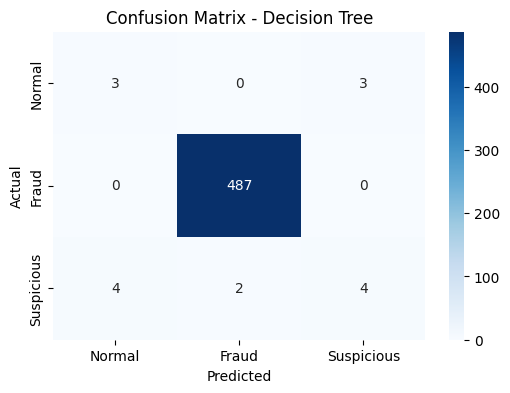

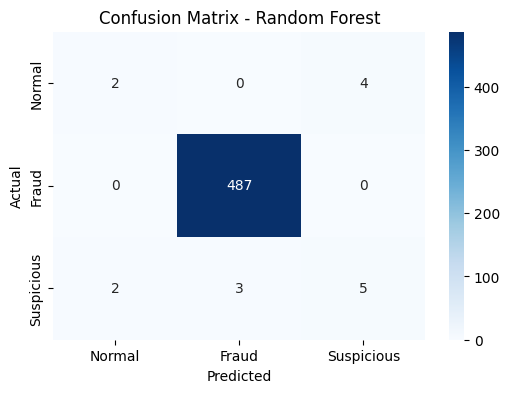

In [15]:
# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud', 'Suspicious'], yticklabels=['Normal', 'Fraud', 'Suspicious'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Decision Tree Confusion Matrix
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Random Forest Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Evaluasi menunjukan bahwa model Decision Tree memiliki performa yang lebih baik jika melihat dari F1-score dan Precision yang lebih tinggi dibandingkan dengan model Random Forest. Decision Tree maupun Random Forest memiliki accuracy yang sangat tinggi di 98.21% ini menunjukan performa yang sangat baik dalam memprediksi kategori
   
2. Rekomendasi tindakan selanjutnya : Melakukan SMOTE pada dataset membalancekan sebaran data.